In [1]:
class Creditcard:
    def __init__(self,customer,balance, bank ,limit , account):
        self._customer = customer
        self._balance = balance
        self._bank = bank
        self._limit = limit
        self._account = account
    def get_customer(self):
        return self._customer
    
    def get_balance(self):  
        return self._balance
    
    def get_bank(self):
        return self._bank
    
    def get_limit(self):
        return self._limit
    
    def get_account(self):
        return self._account
    
    def charge(self,price):
        if price + self._balance > self._limit:
            return False
        else:
            self._balance += price
            return True
    
    def make_payment(self,amount):
        self._balance -= amount
        return self._balance



In [2]:
import numpy as np
from sklearn.datasets import make_classification


def bootstrap(num_sample, seed = None):
    idx = list(np.random.permutation(range(num_sample)))
    return idx
      
data = make_classification(n_samples=100, n_features=5, n_classes=2)
print(data)
np.random.seed(0)


(array([[ 7.32574776e-01, -1.14369882e+00,  1.55771310e+00,
        -1.33514560e+00, -1.08256915e+00],
       [-5.10435111e-01,  3.05912093e-01, -2.13503130e+00,
         1.66901720e+00,  8.06017770e-01],
       [-8.44253626e-01,  3.38335195e-01,  9.28870486e-01,
        -3.78438381e-01,  1.11338816e+00],
       [ 8.42456144e-01, -3.34316219e-01, -1.03452463e+00,
         4.53381331e-01, -1.10571459e+00],
       [-1.38231312e+00, -4.97175622e-01,  2.52234956e-01,
         2.73201955e-01,  1.88547810e+00],
       [-1.49669127e+00,  1.67310060e+00,  1.60131114e-01,
         3.75316734e-01,  2.04705647e+00],
       [ 7.00439050e-01, -8.59446860e-01, -9.47121096e-01,
         4.38175100e-01, -9.15032572e-01],
       [ 7.59810073e-01,  5.71751975e-01, -1.10499611e+00,
         5.29925167e-01, -9.88769972e-01],
       [-9.20667079e-01,  1.93067006e-01,  7.70007029e-01,
        -2.41718600e-01,  1.22613055e+00],
       [ 1.08467051e+00, -1.88426581e+00, -1.14082271e+00,
         4.49214639e-0

Hệ số ước tính (từ mẫu gốc): [[0.22962596]
 [2.92754039]]
Khoảng tin cậy 95% cho hệ số: 
[[-0.11102025]
 [ 2.28045335]] đến [[0.60347196]
 [3.54622447]]


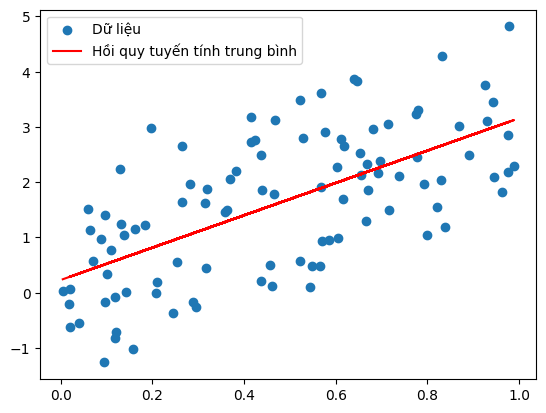

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu giả lập (X, y)
np.random.seed(0)
X = np.random.rand(100, 1)  # 100 điểm dữ liệu đầu vào
y = 3 * X + np.random.randn(100, 1)  # y = 3x + nhiễu ngẫu nhiên

# Số lần lấy mẫu lại (bootstrap)
n_iterations = 1000
n_size = len(X)

# Hàm đệ quy để thực hiện Bootstrap
def bootstrap_recursive(iteration, max_iterations, X, y, n_size, bootstrap_coeffs):
    if iteration >= max_iterations:
        return bootstrap_coeffs
    else:
        # Lấy mẫu ngẫu nhiên từ dữ liệu với khả năng trùng lặp
        indices = np.random.choice(range(n_size), size=n_size, replace=True)
        X_sample = X[indices]
        y_sample = y[indices]

        # Hồi quy tuyến tính (sử dụng phương pháp bình phương tối thiểu)
        X_sample_bias = np.c_[np.ones((n_size, 1)), X_sample]  # Thêm một cột cho intercept
        coeffs = np.linalg.inv(X_sample_bias.T @ X_sample_bias) @ X_sample_bias.T @ y_sample
        bootstrap_coeffs.append(coeffs)

        # Gọi lại hàm đệ quy với iteration + 1
        return bootstrap_recursive(iteration + 1, max_iterations, X, y, n_size, bootstrap_coeffs)

# Danh sách để lưu hệ số của mỗi mô hình hồi quy
bootstrap_coeffs = []

# Thực hiện Bootstrap bằng cách gọi hàm đệ quy
bootstrap_coeffs = bootstrap_recursive(0, n_iterations, X, y, n_size, bootstrap_coeffs)

# Chuyển kết quả thành mảng NumPy để tính các thống kê
bootstrap_coeffs = np.array(bootstrap_coeffs)

# Tính khoảng tin cậy 95% cho hệ số
lower_bound = np.percentile(bootstrap_coeffs, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_coeffs, 97.5, axis=0)

print(f"Hệ số ước tính (từ mẫu gốc): {np.mean(bootstrap_coeffs, axis=0)}")
print(f"Khoảng tin cậy 95% cho hệ số: \n{lower_bound} đến {upper_bound}")

# Vẽ kết quả
plt.scatter(X, y, label='Dữ liệu')
plt.plot(X, np.mean(bootstrap_coeffs, axis=0)[1] * X + np.mean(bootstrap_coeffs, axis=0)[0], color='red', label='Hồi quy tuyến tính trung bình')
plt.legend()
plt.show()
